<a href="https://www.kaggle.com/code/akshaypharande/credit-card-lead-prediction-job-a-thon?scriptVersionId=118006839" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem Statement

Credit Card Lead Prediction Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products,like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
Customer details (gender, age, region etc.) Details of his/her relationship with the bank (Channel_Code,Vintage,'Avg_Asset_Value etc.)

#  Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__

### Step 1: Importing the Relevant Libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
test = pd.read_csv("../input/credit-card/test_mSzZ8RL.csv")
train = pd.read_csv("../input/credit-card/train_s3TEQDk.csv")

In [3]:
train.shape,test.shape

((245725, 11), (105312, 10))

* __We have 245725 rows and 11 columns in Train set whereas Test set has 105312 rows and 10 columns.__

In [4]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [5]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

* __We have 12% of missing values in Credit_Product column.__

In [6]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [7]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


### Step 3: Data Cleaning 

In [8]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

* __Credit Product has some missing values in both train and test data.__

* __We neead to fill Missing Value credit product column using mode because column contain catagorical data.__

In [10]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(29325, 12522)

In [11]:
print(train['Credit_Product'].value_counts())
print('******************************************')
print(test['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
******************************************
No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [12]:
#Imputing with Mode
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [13]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(0, 0)

__We have succesfully imputed the missing values from the column Credit_Product.__

### Step 4: Exploratory Data Analysis

In [14]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [15]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


__1.Gender__

In [16]:
train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

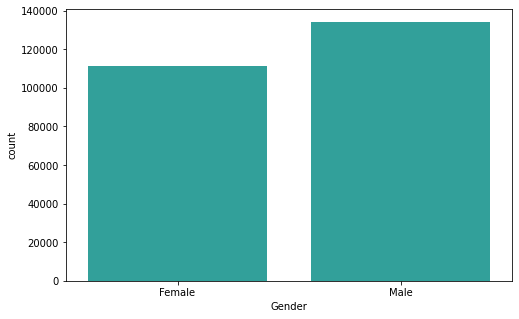

In [17]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,color='lightseagreen')

__From above graph it is clear that the bank have more males customers than females.__ 

__2.Region_Code__

In [18]:
train['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

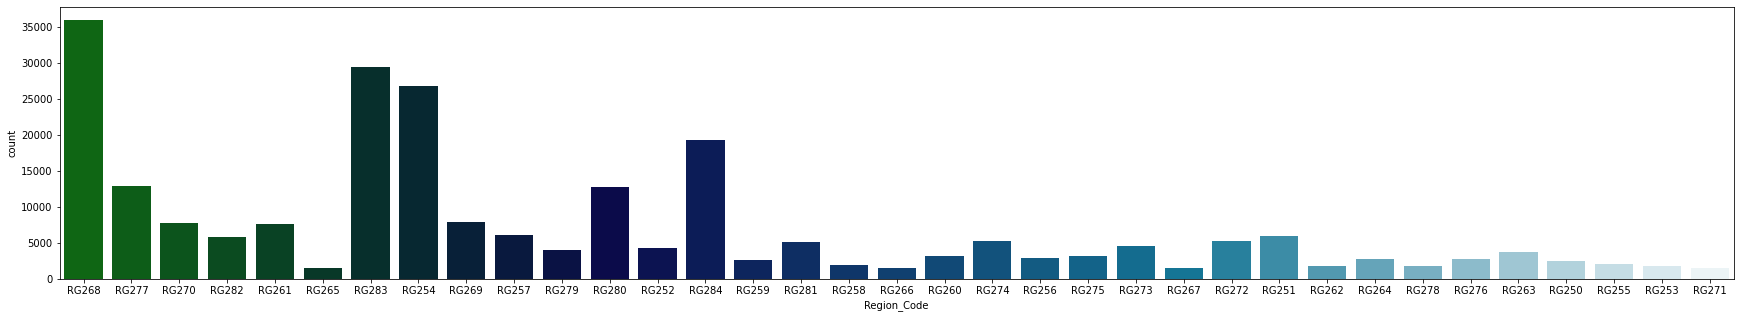

In [19]:
plt.figure(figsize=(30,5))
sns.countplot('Region_Code',data=train,palette='ocean')

__More number of customers from region code RG268, RG283, RG254, RG284, RG277 and RG280 respectively.__

__3. Occupation__

In [20]:
train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

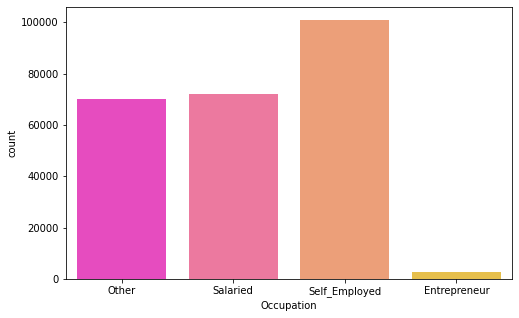

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='spring')

__Most of customers are self employed__

__4. Channel_Code__

In [22]:
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

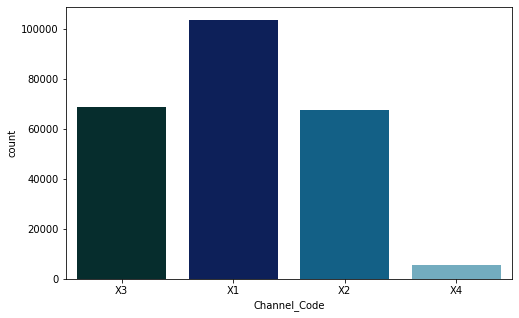

In [23]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='ocean')

__Most of customers having channel code X1.__

__5. Credit_Product__

In [24]:
train['Credit_Product'].value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

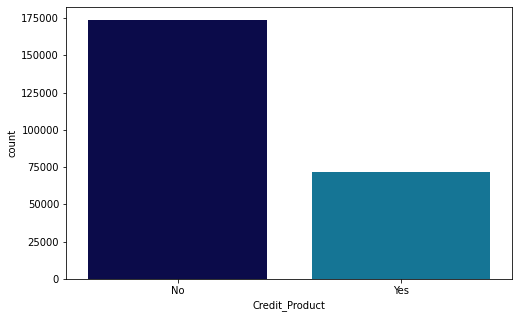

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='ocean')

__Least Number of customer credited their product__

__6. Is_Active__

In [26]:
train['Is_Active'].value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

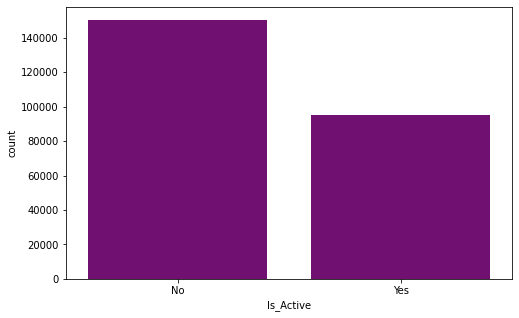

In [27]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,color='purple')

__Least Number of customers are active so bank required to increase their customer interaction so customers always know about bank products and leads to increase in active customers.__

__7. Is_Lead__

In [28]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

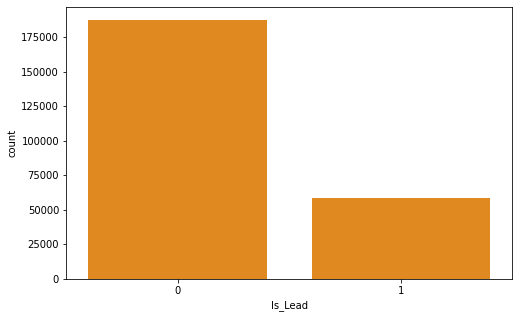

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Lead',data=train,color='darkorange')

__From above graph it is clear that leaat number of leads possible to generate.So, Bank require to apply corrective measures to increase lead.__

__8. Age__

Histogram by Age


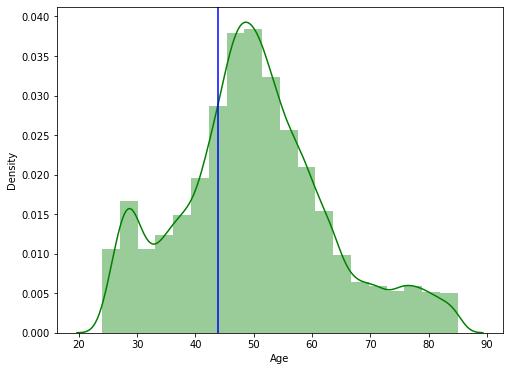

In [30]:
print("Histogram by Age")

plt.figure(figsize = (8 , 6))
sns.distplot(train.query('Is_Lead == 1').Age, bins = 20, color="green")
mean_age = train.Age.mean()
plt.axvline(mean_age,0,1, color = "blue")

__Majority of the credit card holders are between 45 to 55 years old__

# Step 5: Building Models

In [31]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [32]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [34]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = train.drop(['Is_Lead','ID'], axis=1)

# storing the dependent variable as y
y = train['Is_Lead']

In [35]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

* __XGBClassifier__

In [36]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

In [37]:
from xgboost import XGBClassifier
xgb_model = cross_val(X, y, XGBClassifier, xgb_params)

Fold: 0
[08:51:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68616
[400]	validation_0-logloss:0.46383
[800]	validation_0-logloss:0.45398
[1200]	validation_0-logloss:0.44979
[1600]	validation_0-logloss:0.44798
[2000]	validation_0-logloss:0.44672
[2400]	validation_0-logloss:0.44578
[2800]	validation_0-logloss:0.44501
[3200]	validation_0-logloss:0.44458
[3600]	validation_0-logloss:0.44398
[4000]	validation_0-logloss:0.44363
[4400]	validation_0-logloss:0.44332
[4800]	validation_0-logloss:0.44316
[4839]	validation_0-logloss:0.44316
roc_auc_score: 0.7834154677524747
--------------------------------------------------
Fold: 1
[08:54:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was c

In [38]:
submission = pd.read_csv('../input/credit-card/sample_submission_eyYijxG.csv')
test = test.drop('ID', axis=1)
final_predictions = xgb_model.predict_proba(test)[:,1]
submission['Is_Lead'] = final_predictions
#only positive predictions for the target variable
submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

As a learner this is my first experience with this type of competition.Whatever I learned from analytics vidhya tried to apply here.

1.First of all I found that there are missing values in the data. The column which has missing value is categorical so filled with mode.Then I did visualization in that I found that except ID every column is important for our analysis.

2.Then I started model building first I chose DecisiontreeClassifier because it is a classification problem but I got poor results so I switched to logistic and linear regression. Linear regression gave me better result than logistic and decision tree.But this is not upto the mark.So I decided to use ensemble learnings In that I used catboost, random forest,Xgboost,Light bgm stacking and averaging from all of this cat boost and Xgboost gave better result. Finally I decided to use Xgboost over catboost because of better AUC.
It was a great experience. 
Thank you........


__END__